# Data Visualization Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
import random

sns.set(style="whitegrid")

In [2]:
base_path = Path("../inputs")
print("What's in your inputs folder:")
print(list(base_path.iterdir()))

What's in your inputs folder:
[PosixPath('../inputs/split-leaves'), PosixPath('../inputs/cherry_leaves')]


In [3]:
# Define dataset paths
base_path = Path("../inputs/split-leaves")
subsets = ["train", "validation", "test"]
classes = ["healthy", "powdery_mildew"]

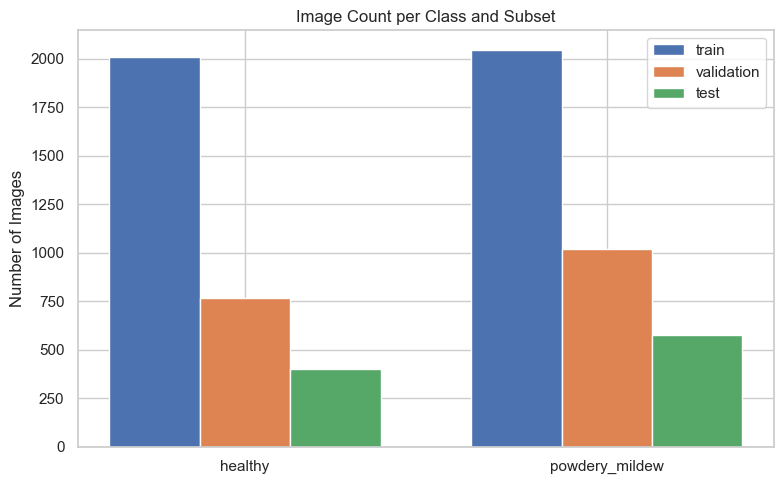

In [4]:
# Count images per class in each subset
image_counts = {subset: {cls: len(list((base_path / subset / cls).glob("*"))) for cls in classes} for subset in subsets}

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
for i, subset in enumerate(subsets):
    values = list(image_counts[subset].values())
    ax.bar([x + i * bar_width for x in range(len(classes))], values, width=bar_width, label=subset)

ax.set_xticks([r + bar_width for r in range(len(classes))])
ax.set_xticklabels(classes)
ax.set_ylabel("Number of Images")
ax.set_title("Image Count per Class and Subset")
ax.legend()
plt.tight_layout()
plt.show()

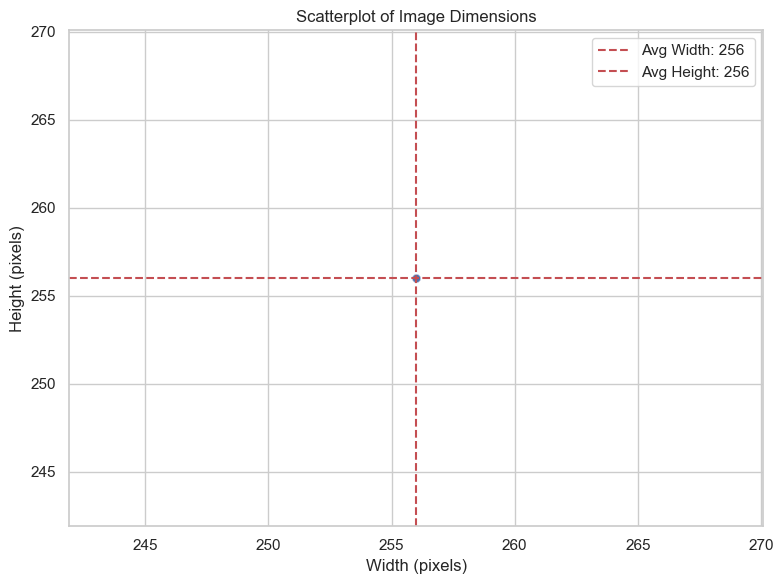

Width average: 256 
Height average: 256


In [5]:
#image shape distribution.

from matplotlib.image import imread

dim1, dim2 = [], []
train_path = base_path / 'train'
labels = [d.name for d in train_path.iterdir() if d.is_dir()]

for label in labels:
    for image_filename in os.listdir(train_path / label):
        img_path = train_path / label / image_filename
        try:
            img = imread(img_path)
            d1, d2 = img.shape[:2]
            dim1.append(d1)  # height
            dim2.append(d2)  # width
        except Exception as e:
            print(f"Skipped: {img_path}, Reason: {e}")

sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=dim2, y=dim1, alpha=0.3)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim2_mean, color='r', linestyle='--', label=f'Avg Width: {dim2_mean}')
axes.axhline(y=dim1_mean, color='r', linestyle='--', label=f'Avg Height: {dim1_mean}')
axes.legend()
plt.title("Scatterplot of Image Dimensions")
plt.tight_layout()
plt.show()

print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")


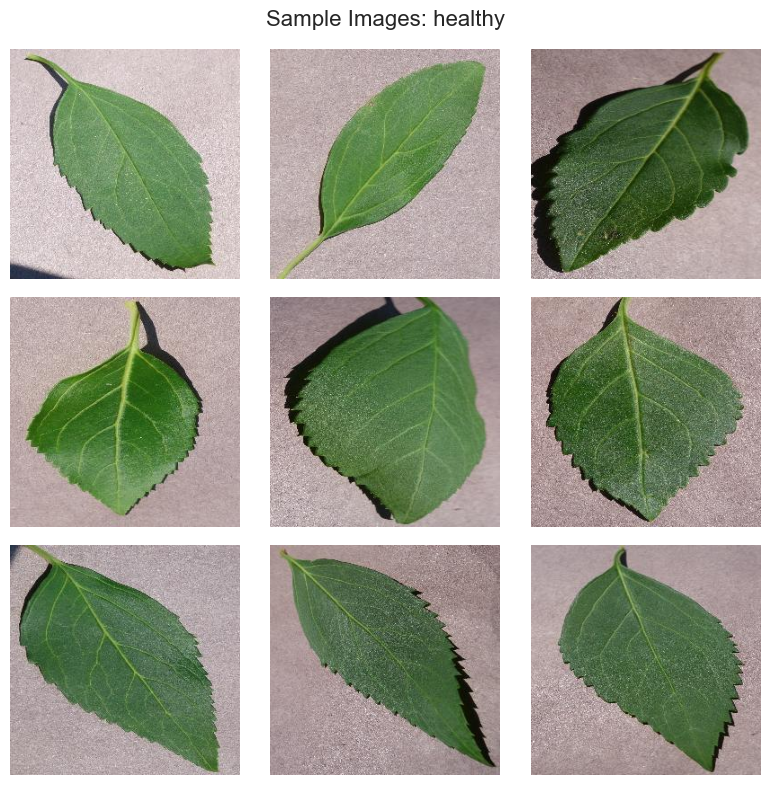

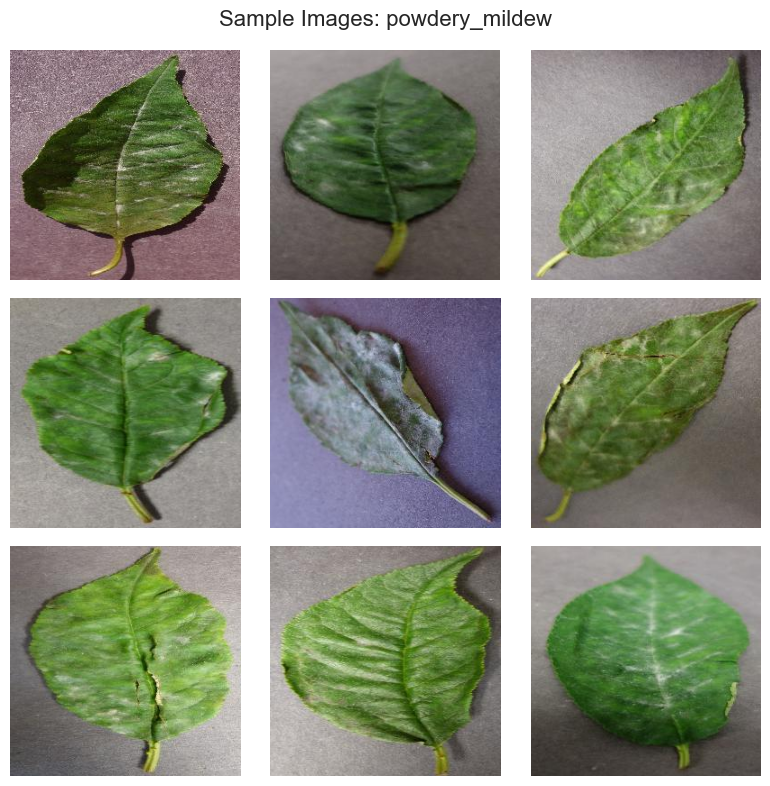

In [6]:
# Display a 3x3 grid of sample images per class from train set
def plot_image_grid(label, num_images=9):
    img_dir = base_path / "train" / label
    images = list(img_dir.glob("*"))
    sample_imgs = random.sample(images, num_images)

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.suptitle(f"Sample Images: {label}", fontsize=16)
    for img_path, ax in zip(sample_imgs, axes.flatten()):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

for cls in classes:
    plot_image_grid(cls)


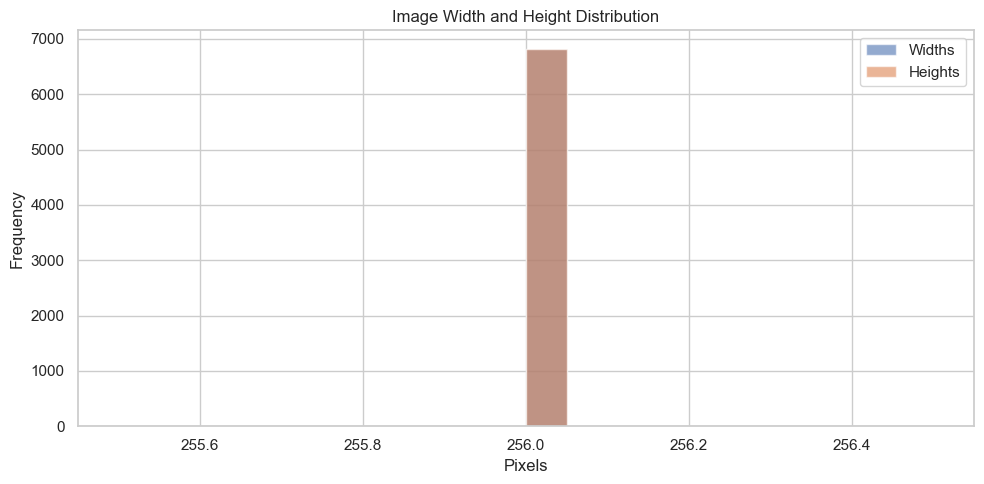

In [7]:
# Analyze image size distribution
from collections import Counter

def get_image_sizes(folder):
    sizes = []
    for subset in subsets:
        for cls in classes:
            for img_path in (base_path / subset / cls).glob("*"):
                try:
                    with Image.open(img_path) as img:
                        sizes.append(img.size)
                except:
                    pass
    return sizes

sizes = get_image_sizes(base_path)
widths, heights = zip(*sizes)
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=20, alpha=0.6, label="Widths")
plt.hist(heights, bins=20, alpha=0.6, label="Heights")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Image Width and Height Distribution")
plt.legend()
plt.tight_layout()
plt.show()

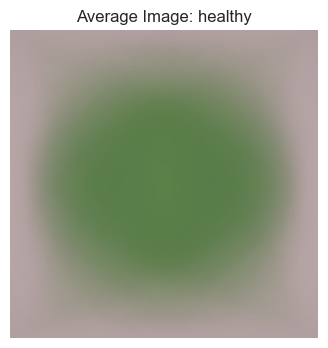

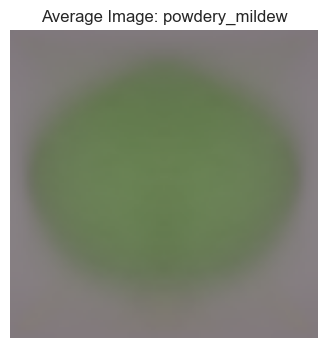

In [8]:
# Compute and plot the average image per class
def  (label):
    img_dir = base_path / "train" / label
    images = list(img_dir.glob("*"))
    imgs = []
    for img_path in images:
        try:
            img = Image.open(img_path).resize((128, 128)).convert("RGB")
            imgs.append(np.array(img))
        except:
            continue
    return np.mean(imgs, axis=0).astype(np.uint8)

for cls in classes:
    avg_img = compute_average_image(cls)
    plt.figure(figsize=(4, 4))
    plt.imshow(avg_img)
    plt.title(f"Average Image: {cls}")
    plt.axis("off")
    plt.show()


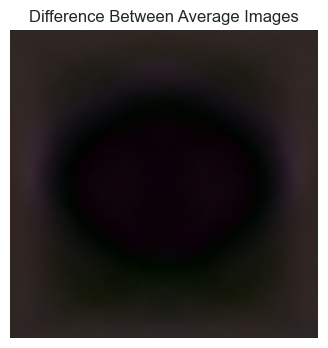

In [9]:
# Plot the absolute difference between average images
avg_healthy = compute_average_image("healthy")
avg_mildew = compute_average_image("powdery_mildew")

diff = np.abs(avg_healthy.astype(int) - avg_mildew.astype(int)).astype(np.uint8)
plt.figure(figsize=(4, 4))
plt.imshow(diff)
plt.title("Difference Between Average Images")
plt.axis("off")
plt.show()